In [881]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None

In [882]:
df = pd.read_csv("../../Data/Bank Churn Dataset/train.csv",header=0)

In [883]:
class PreprocessData():
    def __init__(self,df,target_col) -> None:
        self.df = df
        self.target_col = target_col
        self.encode_ref = {}
    
    def drop_columns(self,c_list):
        self.df =  self.df.drop(c_list,axis=1)
    
    def count_nulls(self):
        counts = 0
        for c_name in self.df.columns:
            na_count = self.df[c_name].isnull().sum()
            if(na_count>0):
                counts+=1
                print(f"{c_name} has {na_count} null values")
        if(counts == 0):
            print("No Null Values Present")
    def rename_columns(self,old,new):
        if(len(old) == len(new)):
            cols_dict = {}
            for old_name,new_name in zip(old,new):
                # print(old_name)
                # print(new_name)
                cols_dict[old_name] = new_name
            self.df.rename(columns = cols_dict, inplace = True)

    def get_categorical_cols(self,threshold = 0.01, get_col_perc = False):
        categorical_cols = []
        for c_name in self.df.columns:
            length = len(self.df[c_name].value_counts())
            perc = (length/self.df.shape[0])*100
            if(get_col_perc):
                print(f"{c_name} has {perc} of different values\n")
            if(perc<threshold):
                categorical_cols.append(c_name)
                # print(f"{c_name} is Catergorical Data")
        return categorical_cols

    def encode_cols(self , cols = None, threshold = 0.01, get_col_perc = False):
        if(cols == None):
            cols = self.get_categorical_cols(threshold=threshold, get_col_perc= get_col_perc)
        # print(cols)
        for c_name in cols:
            self.encode_ref[c_name] = self.df.groupby(c_name)[self.target_col].agg("mean")
            self.df[c_name] = self.df.groupby(c_name)[self.target_col].transform("mean")
    
    def get_object_cols(self):
        dtypes = self.df.dtypes
        cols = self.df.columns
        obj_list = []
        for c_name , dtype in zip(cols,dtypes):
            if(dtype == "object"):
                obj_list.append(c_name)
        return obj_list 
    
    def iqr_treatment(self,df):
        Q3 = np.quantile(df, 0.75)
        Q1 = np.quantile(df, 0.25)
        IQR = Q3 - Q1
        lower_range = Q1 - 1.5 * IQR
        upper_range = Q3 + 1.5 * IQR
        df[df>upper_range] = upper_range
        df[df<lower_range] = lower_range
        return df

    def treat_outlier(self , cols = None):
        if(cols == None):
            cols = self.df.columns
            non_outlier_cols = [self.target_col]
            non_outlier_cols.extend(self.get_categorical_cols())
            for c_name in non_outlier_cols:
                if(c_name in cols):
                    cols =cols.drop(c_name)
        for c_name in cols:
            self.df[c_name] = self.iqr_treatment(self.df[c_name])

    def boxplot(self , cols = None):
        if(cols == None):
            cols = self.df.columns
            cols = cols.drop(self.target_col)
        fig , ax = plt.subplots( math.ceil(len(cols)/3) , 3)
        index = 0
        for axes in ax:
            for axx in axes:
                if(index<len(cols)):
                    sns.boxplot(self.df[cols[index]], ax=axx)
                    index+=1

In [884]:
pr = PreprocessData(df, "Exited")

In [885]:
pr.drop_columns(["id","CustomerId","Surname"])

In [886]:
pr.count_nulls()

No Null Values Present


In [887]:
pr.rename_columns(["Geography","NumOfProducts"],["Country","products_number"])

In [888]:
pr.get_object_cols()

['Country', 'Gender']

In [889]:
cat_cols = pr.get_categorical_cols()

In [890]:
cat_cols

['Country',
 'Gender',
 'Tenure',
 'products_number',
 'HasCrCard',
 'IsActiveMember',
 'Exited']

In [891]:
pr.encode_cols(['Country', 'Gender'])

In [892]:
pr.df.head()

,CreditScore,Country,Gender,Age,Tenure,Balance,products_number,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,0.165282,0.159055,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,0.165282,0.159055,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,0.165282,0.159055,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,0.165282,0.159055,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,0.172176,0.159055,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [893]:
pr.encode_ref

{'Country': Country
 France     0.165282
 Germany    0.378952
 Spain      0.172176
 Name: Exited, dtype: float64,
 'Gender': Gender
 Female    0.279687
 Male      0.159055
 Name: Exited, dtype: float64}

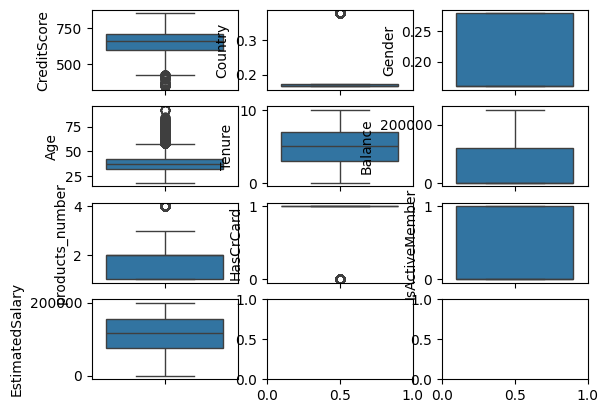

In [894]:
pr.boxplot()

In [895]:
len(pr.df.columns)

11

In [896]:
pr.treat_outlier()

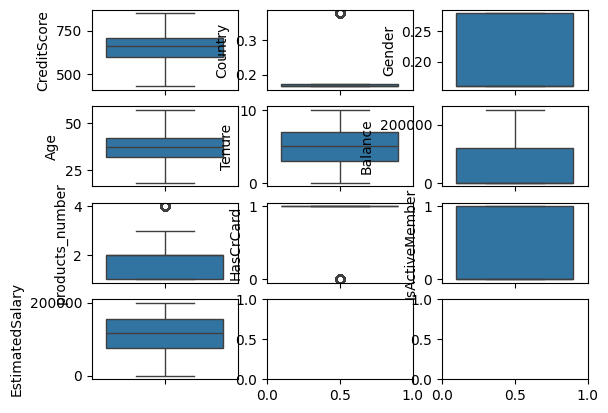

In [905]:
pr.boxplot()